### LSE Data Analytics Online Career Accelerator 

# DA301:  Advanced Analytics for Organisational Impact

### Scenario
You are a data analyst working for Turtle Games, a game manufacturer and retailer. They manufacture and sell their own products, along with sourcing and selling products manufactured by other companies. Their product range includes books, board games, video games and toys. They have a global customer base and have a business objective of improving overall sales performance by utilising customer trends. In particular, Turtle Games wants to understand: 
- how customers accumulate loyalty points (Week 1)
- how useful are remuneration and spending scores data (Week 2)
- can social data (e.g. customer reviews) be used in marketing campaigns (Week 3)
- what is the impact on sales per product (Week 4)
- the reliability of the data (e.g. normal distribution, Skewness, Kurtosis) (Week 5)
- if there is any possible relationship(s) in sales between North America, Europe, and global sales (Week 6).

# Week 1 assignment: Linear regression using Python
The marketing department of Turtle Games prefers Python for data analysis. As you are fluent in Python, they asked you to assist with data analysis of social media data. The marketing department wants to better understand how users accumulate loyalty points. Therefore, you need to investigate the possible relationships between the loyalty points, age, remuneration, and spending scores. Note that you will use this data set in future modules as well and it is, therefore, strongly encouraged to first clean the data as per provided guidelines and then save a copy of the clean data for future use.

## Instructions
1. Load and explore the data.
    1. Create a new DataFrame (e.g. reviews).
    2. Sense-check the DataFrame.
    3. Determine if there are any missing values in the DataFrame.
    4. Create a summary of the descriptive statistics.
2. Remove redundant columns (`language` and `platform`).
3. Change column headings to names that are easier to reference (e.g. `renumeration` and `spending_score`).
4. Save a copy of the clean DataFrame as a CSV file. Import the file to sense-check.
5. Use linear regression and the `statsmodels` functions to evaluate possible linear relationships between loyalty points and age/renumeration/spending scores to determine whether these can be used to predict the loyalty points.
    1. Specify the independent and dependent variables.
    2. Create the OLS model.
    3. Extract the estimated parameters, standard errors, and predicted values.
    4. Generate the regression table based on the X coefficient and constant values.
    5. Plot the linear regression and add a regression line.
6. Include your insights and observations.

## 1. Load and explore the data

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
from statsmodels.formula.api import ols

In [2]:
# Load the CSV file(s) as reviews.
reviews = pd.read_csv('turtle_reviews.csv')

# View the DataFrame.
# View data types.
print(reviews.dtypes)

# View metadate.
print(reviews.info())

gender                     object
age                         int64
remuneration (k£)         float64
spending_score (1-100)      int64
loyalty_points              int64
education                  object
language                   object
platform                   object
product                     int64
review                     object
summary                    object
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  2000 non-null   object 
 1   age                     2000 non-null   int64  
 2   remuneration (k£)       2000 non-null   float64
 3   spending_score (1-100)  2000 non-null   int64  
 4   loyalty_points          2000 non-null   int64  
 5   education               2000 non-null   object 
 6   language                2000 non-null   object 
 7   platform               

In [3]:
# Check if there are any missing values.
reviews.isna().sum()

# There are no missing values

gender                    0
age                       0
remuneration (k£)         0
spending_score (1-100)    0
loyalty_points            0
education                 0
language                  0
platform                  0
product                   0
review                    0
summary                   0
dtype: int64

In [4]:
# View descriptive statistics.
reviews.describe()

age  remuneration (k£)  spending_score (1-100)  loyalty_points  \
count  2000.000000        2000.000000             2000.000000     2000.000000   
mean     39.495000          48.079060               50.000000     1578.032000   
std      13.573212          23.123984               26.094702     1283.239705   
min      17.000000          12.300000                1.000000       25.000000   
25%      29.000000          30.340000               32.000000      772.000000   
50%      38.000000          47.150000               50.000000     1276.000000   
75%      49.000000          63.960000               73.000000     1751.250000   
max      72.000000         112.340000               99.000000     6847.000000   

            product  
count   2000.000000  
mean    4320.521500  
std     3148.938839  
min      107.000000  
25%     1589.250000  
50%     3624.000000  
75%     6654.000000  
max    11086.000000

## 2. Drop columns

In [5]:
# Remove redundant columns.
reviews = reviews.drop(['language','platform'], axis=1)

# View column names.
reviews.columns

Index(['gender', 'age', 'remuneration (k£)', 'spending_score (1-100)',
       'loyalty_points', 'education', 'product', 'review', 'summary'],
      dtype='object')

## 3. Rename columns

In [6]:
# Rename the column headers.
reviews = reviews.rename(columns={'remuneration (k£)':'remuneration',
                                  'spending_score (1-100)':'spending_score'})

# View column names.
reviews.columns

Index(['gender', 'age', 'remuneration', 'spending_score', 'loyalty_points',
       'education', 'product', 'review', 'summary'],
      dtype='object')

## 4. Save the DataFrame as a CSV file

In [7]:
# Create a CSV file as output.
reviews.to_csv('reviews.csv', index=False)

In [8]:
# Import new CSV file with Pandas.
reviews_clean = pd.read_csv('reviews.csv')

# View DataFrame.
reviews_clean.head()

gender  age  remuneration  spending_score  loyalty_points education  \
0    Male   18         12.30              39             210  graduate   
1    Male   23         12.30              81             524  graduate   
2  Female   22         13.12               6              40  graduate   
3  Female   25         13.12              77             562  graduate   
4  Female   33         13.94              40             366  graduate   

   product                                             review  \
0      453  When it comes to a DM's screen, the space on t...   
1      466  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2      254  Nice art, nice printing.  Why two panels are f...   
3      263  Amazing buy! Bought it as a gift for our new d...   
4      291  As my review of GF9's previous screens these w...   

                                             summary  
0  The fact that 50% of this space is wasted on a...  
1  Another worthless Dungeon Master's screen from...  
2                    pretty, but also pretty useless  
3                                         Five Stars  
4                                         Money trap

## 5. Linear regression

### 5a) spending vs loyalty

In [9]:
# Independent variable.
x_spendings = reviews_clean['spending_score']

# Dependent variable.
y = reviews_clean['loyalty_points']

# OLS model and summary.
f_spendings = 'y ~ x_spendings'
test_spendings = ols(f_spendings, data = reviews_clean).fit()
test_spendings.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     1648.
Date:                Fri, 23 Dec 2022   Prob (F-statistic):          2.92e-263
Time:                        16:43:04   Log-Likelihood:                -16550.
No. Observations:                2000   AIC:                         3.310e+04
Df Residuals:                    1998   BIC:                         3.312e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     -75.0527     45.931     -1.634      0.102    -165.129      15.024
x_spendings    33.0617      0.814     40.595      0.000      31.464      34.659
==============================================================================
Omnibus:                      126.554   Durbin-Watson:                   1.191
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              260.528
Skew:                           0.422   Prob(JB):                     2.67e-57
Kurtosis:                       4.554   Cond. No.                         122.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
# Extract the estimated parameters.
print("Parameters: ", test_spendings.params)  

# Extract the standard errors.
print("Standard errors: ", test_spendings.bse)

# Extract the predicted values.
print("Predicted values: ", test_spendings.predict()) 

Parameters:  Intercept     -75.052663
x_spendings    33.061693
dtype: float64
Standard errors:  Intercept      45.930554
x_spendings     0.814419
dtype: float64
Predicted values:  [1214.35337415 2602.94449102  123.31749662 ... 2933.56142361  453.93442921
  189.44088314]


In [11]:
# Set the X coefficient and the constant to generate the regression table.
y_spendings_pred = -75.0527 + 33.0617*x_spendings

# View the output.
y_spendings_pred

0       1214.3536
1       2602.9450
2        123.3175
3       2470.6982
4       1247.4153
          ...    
1995    2206.2046
1996     189.4409
1997    2933.5620
1998     453.9345
1999     189.4409
Name: spending_score, Length: 2000, dtype: float64

Text(0.5, 1.0, 'Spendings - Loyalty Points')

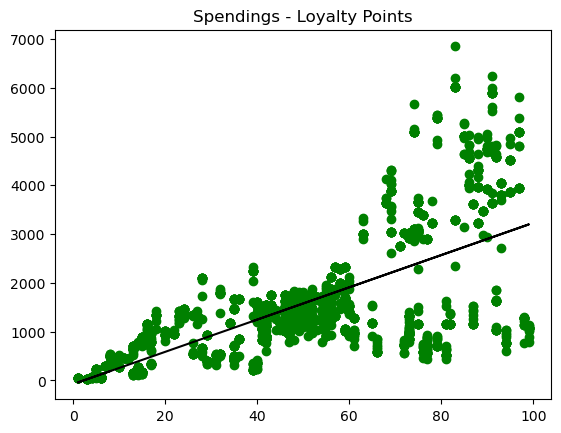

In [12]:
# Plot the graph with a regression line.
plt.scatter(x_spendings, y, color='green')
plt.plot(x_spendings, y_spendings_pred, color = 'black')
plt.title("Spendings - Loyalty Points")

### 5b) renumeration vs loyalty

In [13]:
# Independent variable.
x_remuneration = reviews_clean['remuneration']

# Dependent variable.
y = reviews_clean['loyalty_points']

# OLS model and summary.
f_remuneration = 'y ~ x_remuneration'
test_remuneration = ols(f_remuneration, data = reviews_clean).fit()
test_remuneration.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     1222.
Date:                Fri, 23 Dec 2022   Prob (F-statistic):          2.43e-209
Time:                        16:43:05   Log-Likelihood:                -16674.
No. Observations:                2000   AIC:                         3.335e+04
Df Residuals:                    1998   BIC:                         3.336e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        -65.6865     52.171     -1.259      0.208    -168.001      36.628
x_remuneration    34.1878      0.978     34.960      0.000      32.270      36.106
==============================================================================
Omnibus:                       21.285   Durbin-Watson:                   3.622
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.715
Skew:                           0.089   Prob(JB):                     1.30e-07
Kurtosis:                       3.590   Cond. No.                         123.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
# Extract the estimated parameters.
print("Parameters: ", test_remuneration.params)  

# Extract the standard errors.
print("Standard errors: ", test_remuneration.bse)

# Extract the predicted values.
print("Predicted values: ", test_remuneration.predict()) 

Parameters:  Intercept        -65.686513
x_remuneration    34.187825
dtype: float64
Standard errors:  Intercept         52.170717
x_remuneration     0.977925
dtype: float64
Predicted values:  [ 354.82374068  354.82374068  382.85775758 ... 3102.15739671 3298.39551499
 3102.15739671]


In [15]:
# Set the the X coefficient and the constant to generate the regression table.
y_remuneration_pred = -65.6865 + 34.1878*x_remuneration

# View the output.
y_remuneration_pred

0        354.823440
1        354.823440
2        382.857436
3        382.857436
4        410.891432
           ...     
1995    2821.815088
1996    3102.155048
1997    3102.155048
1998    3298.393020
1999    3102.155048
Name: remuneration, Length: 2000, dtype: float64

Text(0.5, 1.0, 'Remuneration - Loyalty Points')

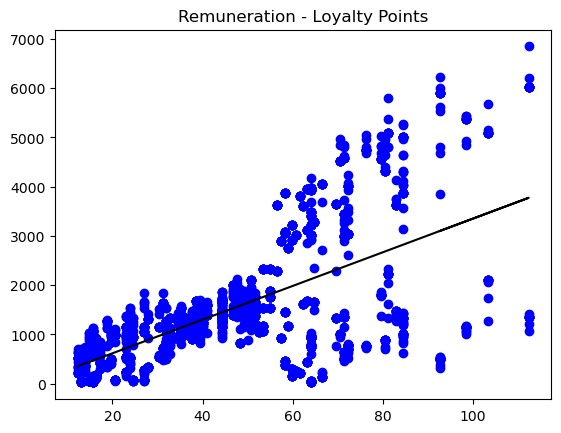

In [16]:
# Plot graph with regression line.
plt.scatter(x_remuneration, y, color='blue')
plt.plot(x_remuneration, y_remuneration_pred, color='black')
plt.title("Remuneration - Loyalty Points")

### 5c) age vs loyalty

In [17]:
# Independent variable.
x_age = reviews_clean['age']

# Dependent variable.
y = reviews_clean['loyalty_points']

# OLS model and summary.
f_age = 'y ~ x_age'
test_age = ols(f_age, data = reviews_clean).fit()
test_age.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.606
Date:                Fri, 23 Dec 2022   Prob (F-statistic):             0.0577
Time:                        16:43:05   Log-Likelihood:                -17150.
No. Observations:                2000   AIC:                         3.430e+04
Df Residuals:                    1998   BIC:                         3.431e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1736.5177     88.249     19.678      0.000    1563.449    1909.587
x_age         -4.0128      2.113     -1.899      0.058      -8.157       0.131
==============================================================================
Omnibus:                      481.477   Durbin-Watson:                   2.277
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              937.734
Skew:                           1.449   Prob(JB):                    2.36e-204
Kurtosis:                       4.688   Cond. No.                         129.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
# Extract the estimated parameters.
print("Parameters: ", test_age.params)  

# Extract the standard errors.
print("Standard errors: ", test_age.bse)

# Extract the predicted values.
print("Predicted values: ", test_age.predict()) 

Parameters:  Intercept    1736.517739
x_age          -4.012805
dtype: float64
Standard errors:  Intercept    88.248731
x_age         2.113177
dtype: float64
Predicted values:  [1664.2872467  1644.22322095 1648.2360261  ... 1600.0823643  1600.0823643
 1608.1079746 ]


In [19]:
# Set the X coefficient and the constant to generate the regression table.
y_age_pred = 1736.5177 + -4.0128*x_age

# View the output.
y_age_pred

0       1664.2873
1       1644.2233
2       1648.2361
3       1636.1977
4       1604.0953
          ...    
1995    1588.0441
1996    1563.9673
1997    1600.0825
1998    1600.0825
1999    1608.1081
Name: age, Length: 2000, dtype: float64

Text(0.5, 1.0, 'Age - Loyalty Points')

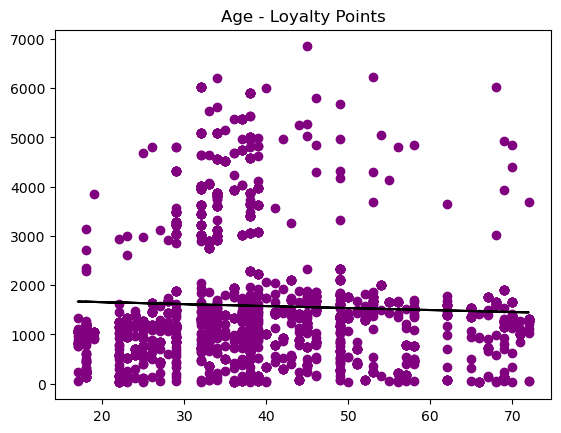

In [20]:
# Plot graph with regression line.
plt.scatter(x_age, y, color = 'purple')
plt.plot(x_age, y_age_pred, color ='black')
plt.title("Age - Loyalty Points")

## 6. Observations and insights

***Your observations here...***






Remuneration vs Loyalty Points
The regrssion line indicates a remuneration positively affects loyalty points. This means that if the more remuneration a customer has, the more loyalty points they are likely to accumulate. However, the p-value is is lower than 0.05, meaning that the relationship between the two is significant.


Spending score vs Loyalty Points
The regrssion line indicates a spending score positively affects loyalty points. This means that if the more spending score a customer has, the more loyalty points they are likely to accumulate. The p-value is lower than 0.05, meaning that the relationship between the two is significant.

Age vs Loyalty Points
The regression line shows that age negatively impacts loyalty points. In another word, older customers are likely to accumulate less loyalty points. However, the impact is very small. the p-value is greater than 0.05, meaning that this observed relationship is likely to have happened by chance.



# 

# Week 2 assignment: Clustering with *k*-means using Python

The marketing department also wants to better understand the usefulness of renumeration and spending scores but do not know where to begin. You are tasked to identify groups within the customer base that can be used to target specific market segments. Use *k*-means clustering to identify the optimal number of clusters and then apply and plot the data using the created segments.

## Instructions
1. Prepare the data for clustering. 
    1. Import the CSV file you have prepared in Week 1.
    2. Create a new DataFrame (e.g. `df2`) containing the `renumeration` and `spending_score` columns.
    3. Explore the new DataFrame. 
2. Plot the renumeration versus spending score.
    1. Create a scatterplot.
    2. Create a pairplot.
3. Use the Silhouette and Elbow methods to determine the optimal number of clusters for *k*-means clustering.
    1. Plot both methods and explain how you determine the number of clusters to use.
    2. Add titles and legends to the plot.
4. Evaluate the usefulness of at least three values for *k* based on insights from the Elbow and Silhoutte methods.
    1. Plot the predicted *k*-means.
    2. Explain which value might give you the best clustering.
5. Fit a final model using your selected value for *k*.
    1. Justify your selection and comment on the respective cluster sizes of your final solution.
    2. Check the number of observations per predicted class.
6. Plot the clusters and interpret the model.

## 1. Load and explore the data

In [21]:
# Import necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from scipy.spatial.distance import cdist

import warnings
warnings.filterwarnings('ignore')

In [22]:
# Load the CSV file(s) as df2.
df2 = pd.read_csv('reviews.csv')

# View DataFrame.
df2.head()

gender  age  remuneration  spending_score  loyalty_points education  \
0    Male   18         12.30              39             210  graduate   
1    Male   23         12.30              81             524  graduate   
2  Female   22         13.12               6              40  graduate   
3  Female   25         13.12              77             562  graduate   
4  Female   33         13.94              40             366  graduate   

   product                                             review  \
0      453  When it comes to a DM's screen, the space on t...   
1      466  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2      254  Nice art, nice printing.  Why two panels are f...   
3      263  Amazing buy! Bought it as a gift for our new d...   
4      291  As my review of GF9's previous screens these w...   

                                             summary  
0  The fact that 50% of this space is wasted on a...  
1  Another worthless Dungeon Master's screen from...  
2                    pretty, but also pretty useless  
3                                         Five Stars  
4                                         Money trap

In [23]:
# Drop unnecessary columns.
df2 = reviews_clean[['remuneration','spending_score']]
# View DataFrame.
df2.head()

remuneration  spending_score
0         12.30              39
1         12.30              81
2         13.12               6
3         13.12              77
4         13.94              40

In [24]:
# Explore the data.
print(df2.info())
print(df2.dtypes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   remuneration    2000 non-null   float64
 1   spending_score  2000 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 31.4 KB
None
remuneration      float64
spending_score      int64
dtype: object


In [25]:
# Descriptive statistics.
df2.describe()

remuneration  spending_score
count   2000.000000     2000.000000
mean      48.079060       50.000000
std       23.123984       26.094702
min       12.300000        1.000000
25%       30.340000       32.000000
50%       47.150000       50.000000
75%       63.960000       73.000000
max      112.340000       99.000000

## 2. Plot

Text(0.5, 1.0, 'Renumeration - Spending Score')

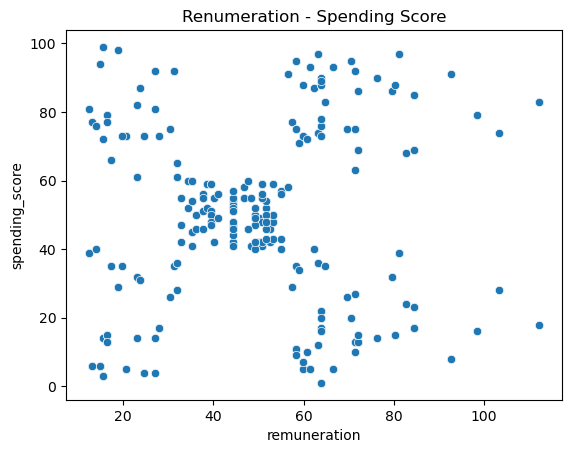

In [26]:
# Create a scatterplot with Seaborn.
sns.scatterplot(x='remuneration',
                y='spending_score',
                data=df2,
                )
plt.title("Renumeration - Spending Score")

Text(0.5, 1.0, 'Renumeration - Spending Score')

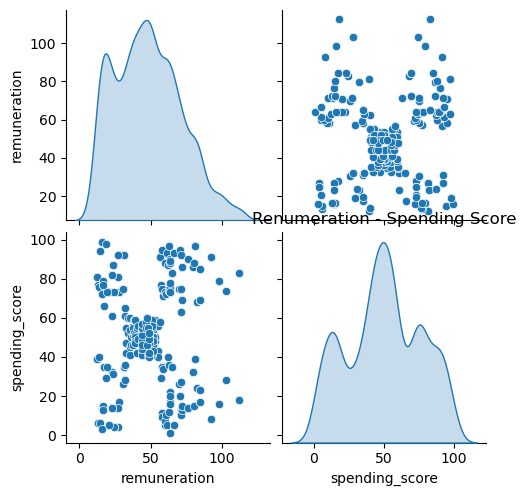

In [27]:
# Create a pairplot with Seaborn.

sns.pairplot(df2, diag_kind='kde')
plt.title("Renumeration - Spending Score")

## 3. Elbow and silhoutte methods

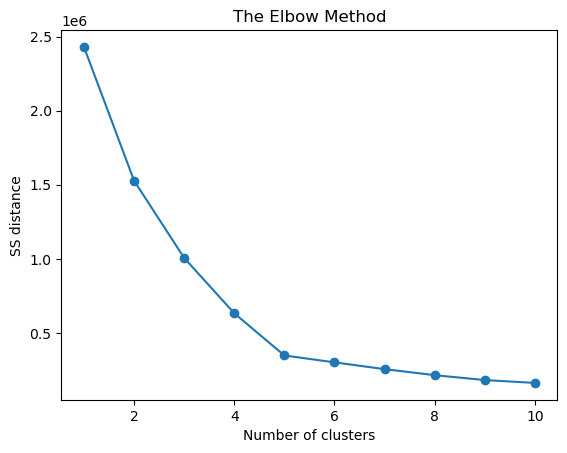

In [28]:
# Determine the number of clusters: Elbow method.
ss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,
                    init='k-means++',
                    max_iter=300,
                    n_init=10,
                    random_state=0)
    kmeans.fit(df2)
    ss.append(kmeans.inertia_)

# Plot the elbow method.
plt.plot(range(1, 11),
         ss,
         marker='o')

# Insert labels and title.
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("SS distance")

plt.show()

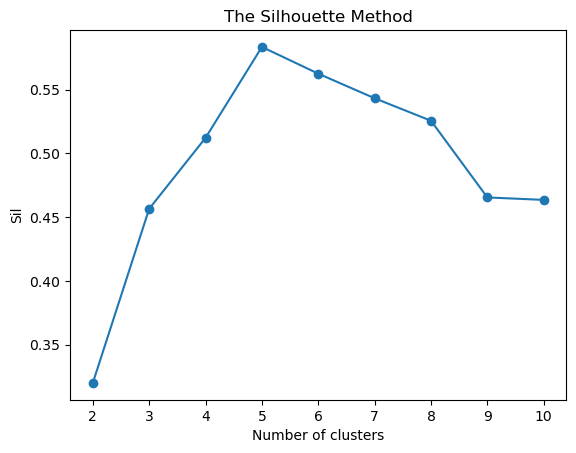

In [29]:
# Determine the number of clusters: Silhouette method.

sil = []
kmax = 10

for k in range(2, kmax+1):
    kmeans_s = KMeans(n_clusters=k).fit(df2)
    labels = kmeans_s.labels_
    sil.append(silhouette_score(df2,
                                labels,
                                metric='euclidean'))

# Plot the silhouette method.
plt.plot(range(2, kmax+1),
         sil,
         marker='o')

# Insert labels and title.
plt.title("The Silhouette Method")
plt.xlabel("Number of clusters")
plt.ylabel("Sil")

plt.show()

## 4. Evaluate k-means model at different values of *k*

## Let's set k=4 and compare it with five and six clusters.

## Evaluate and fit the model

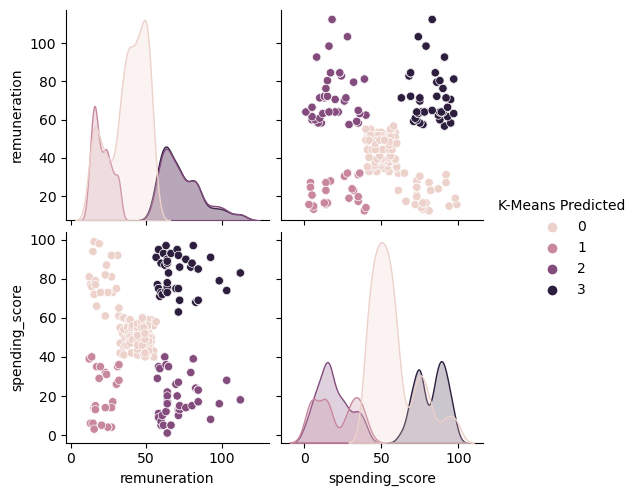

In [30]:
# Use four clusters
kmeans = KMeans(n_clusters = 4, 
                max_iter = 15000,
                init='k-means++',
                random_state=0).fit(df2)

clusters = kmeans.labels_

df2['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(df2, 
             hue='K-Means Predicted',
             diag_kind='kde')


In [31]:
# Check the number of observations per predicted class.
df2['K-Means Predicted'].value_counts()

0    1013
3     356
2     351
1     280
Name: K-Means Predicted, dtype: int64

In [32]:
# View the K-Means predicted.
print(df2.head())

   remuneration  spending_score  K-Means Predicted
0         12.30              39                  1
1         12.30              81                  0
2         13.12               6                  1
3         13.12              77                  0
4         13.94              40                  1


Text(0.5, 1.0, 'Remuneration - Spending Score 4 Clusters')

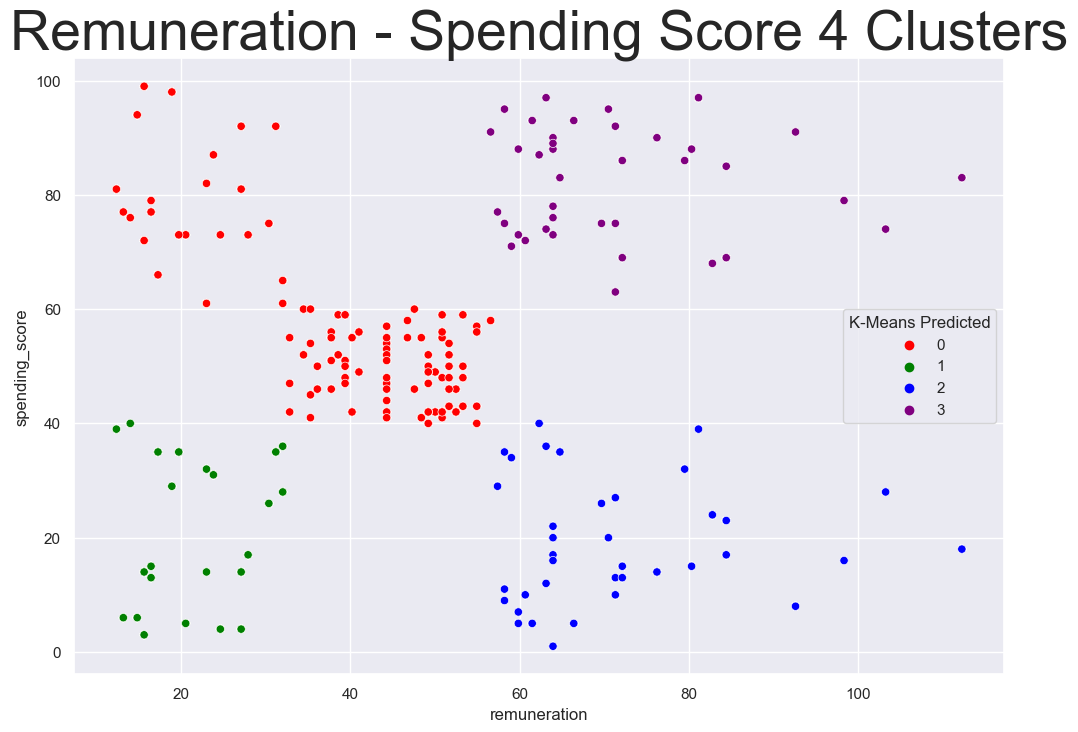

In [33]:
# Visualising the clusters.
# Set plot size.
sns.set(rc = {'figure.figsize':(12, 8)})

# Create a scatterplot.
sns.scatterplot(x='remuneration' , 
                y ='spending_score',
                data=df2,
                hue='K-Means Predicted',
                palette=['red', 'green', 'blue','purple'])
plt.title(label="Remuneration - Spending Score 4 Clusters",
          fontsize=40)

## In case k=5 

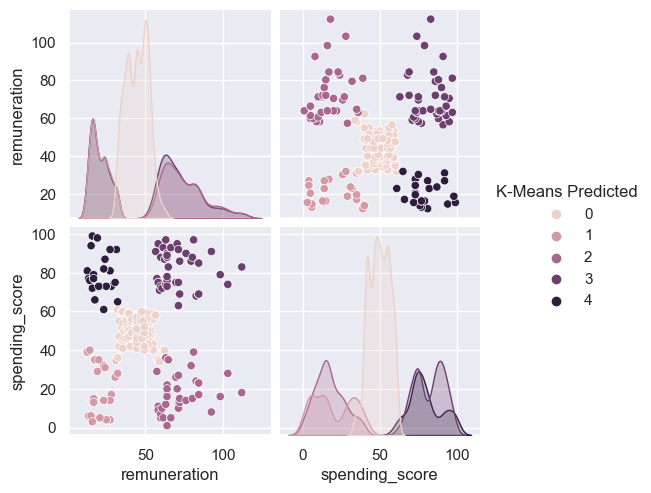

In [34]:
# Use five clusters
kmeans = KMeans(n_clusters = 5, 
                max_iter = 15000,
                init='k-means++',
                random_state=0).fit(df2)

clusters = kmeans.labels_

df2['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(df2, 
             hue='K-Means Predicted',
             diag_kind='kde')


In [35]:
# Check the number of observations per predicted class.
df2['K-Means Predicted'].value_counts()

0    774
3    356
2    330
1    271
4    269
Name: K-Means Predicted, dtype: int64

In [36]:
# View the K-Means predicted.
print(df2.head())

   remuneration  spending_score  K-Means Predicted
0         12.30              39                  1
1         12.30              81                  4
2         13.12               6                  1
3         13.12              77                  4
4         13.94              40                  1


Text(0.5, 1.0, 'Remuneration - Spending Score 5 Clusters')

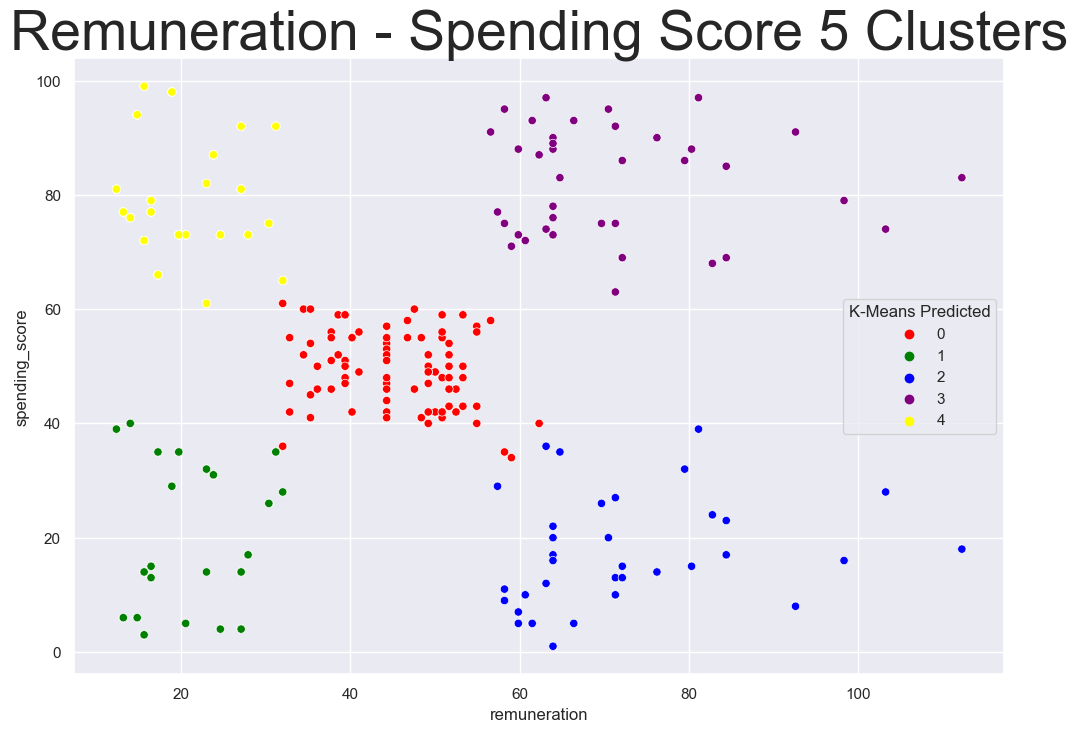

In [37]:
# Visualising the clusters.
# Set plot size.
sns.set(rc = {'figure.figsize':(12, 8)})

# Create a scatterplot.
sns.scatterplot(x='remuneration' , 
                y ='spending_score',
                data=df2,
                hue='K-Means Predicted',
                palette=['red', 'green', 'blue','purple','yellow'])
plt.title(label="Remuneration - Spending Score 5 Clusters",
          fontsize=40)

## In case k=6

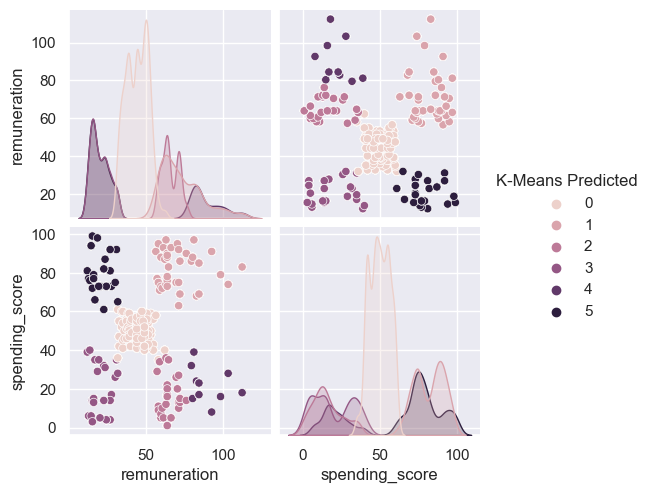

In [38]:
# Use six clusters
kmeans = KMeans(n_clusters = 6, 
                max_iter = 15000,
                init='k-means++',
                random_state=0).fit(df2)

clusters = kmeans.labels_

df2['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(df2, 
             hue='K-Means Predicted',
             diag_kind='kde')



In [39]:
# Check the number of observations per predicted class.
df2['K-Means Predicted'].value_counts()

0    767
1    356
3    271
5    269
2    214
4    123
Name: K-Means Predicted, dtype: int64

In [40]:
# View the K-Means predicted.
print(df2.head())

   remuneration  spending_score  K-Means Predicted
0         12.30              39                  3
1         12.30              81                  5
2         13.12               6                  3
3         13.12              77                  5
4         13.94              40                  3


Text(0.5, 1.0, 'Remuneration - Spending Score 6 Clusters')

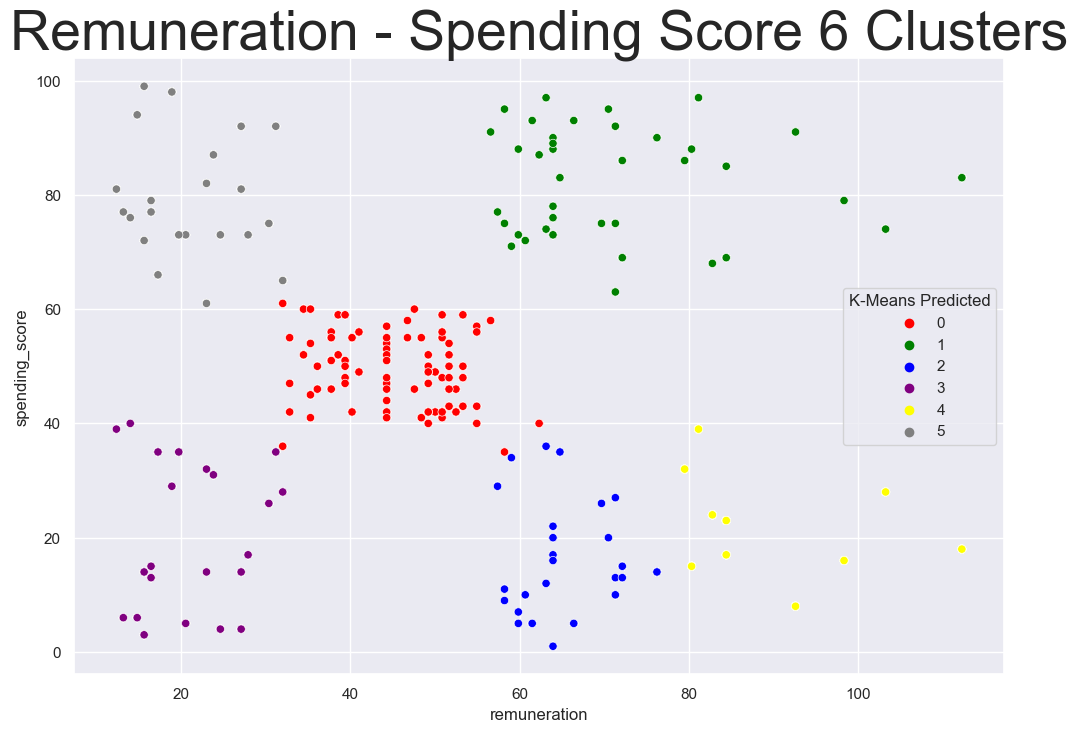

In [41]:
# Visualising the clusters.
# Set plot size.
sns.set(rc = {'figure.figsize':(12, 8)})

# Create a scatterplot.
sns.scatterplot(x='remuneration' , 
                y ='spending_score',
                data=df2,
                hue='K-Means Predicted',
                palette=['red', 'green', 'blue','purple',
                         'yellow','grey'])
plt.title(label="Remuneration - Spending Score 6 Clusters",
          fontsize=40)

## 5. Intepretation and observations.


The Elbow method is a subjective method of determining the most optimal number of clusters. When we take a look at the albow method graph, we can see that the bend(elbow) apeears most prominent where the number of clusters equals to five. Therefore, accordinng to the Elbow method, we can assume that the mostoptimal of clusters is 5.

In the Silhoutte method, we use the location where the the silhoutte score is at it highest to determine the most optimal number of clusters. In this case, that location is k=5. 

Both methods reach the same conclustion that five is the most appropriate number of clusters.



# 

# Week 3 assignment: NLP using Python
Customer reviews were downloaded from the website of Turtle Games. This data will be used to steer the marketing department on how to approach future campaigns. Therefore, the marketing department asked you to identify the 15 most common words used in online product reviews. They also want to have a list of the top 20 positive and negative reviews received from the website. Therefore, you need to apply NLP on the data set.

## Instructions
1. Load and explore the data. 
    1. Sense-check the DataFrame.
    2. You only need to retain the `review` and `summary` columns.
    3. Determine if there are any missing values.
2. Prepare the data for NLP
    1. Change to lower case and join the elements in each of the columns respectively (`review` and `summary`).
    2. Replace punctuation in each of the columns respectively (`review` and `summary`).
    3. Drop duplicates in both columns (`review` and `summary`).
3. Tokenise and create wordclouds for the respective columns (separately).
    1. Create a copy of the DataFrame.
    2. Apply tokenisation on both columns.
    3. Create and plot a wordcloud image.
4. Frequency distribution and polarity.
    1. Create frequency distribution.
    2. Remove alphanumeric characters and stopwords.
    3. Create wordcloud without stopwords.
    4. Identify 15 most common words and polarity.
5. Review polarity and sentiment.
    1. Plot histograms of polarity (use 15 bins) for both columns.
    2. Review the sentiment scores for the respective columns.
6. Identify and print the top 20 positive and negative reviews and summaries respectively.
7. Include your insights and observations.

## 1. Load and explore the data

In [42]:
# Import all the necessary packages.
import pandas as pd
import numpy as np
import nltk 
import os 
import matplotlib.pyplot as plt

# nltk.download ('punkt').
# nltk.download ('stopwords').

from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from textblob import TextBlob
from scipy.stats import norm

# Import Counter.
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

In [43]:
# Load the data set as df3.
df3 = pd.read_csv('turtle_reviews.csv')

# View DataFrame.
df3.head()

gender  age  remuneration (k£)  spending_score (1-100)  loyalty_points  \
0    Male   18              12.30                      39             210   
1    Male   23              12.30                      81             524   
2  Female   22              13.12                       6              40   
3  Female   25              13.12                      77             562   
4  Female   33              13.94                      40             366   

  education language platform  product  \
0  graduate       EN      Web      453   
1  graduate       EN      Web      466   
2  graduate       EN      Web      254   
3  graduate       EN      Web      263   
4  graduate       EN      Web      291   

                                              review  \
0  When it comes to a DM's screen, the space on t...   
1  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2  Nice art, nice printing.  Why two panels are f...   
3  Amazing buy! Bought it as a gift for our new d...   
4  As my review of GF9's previous screens these w...   

                                             summary  
0  The fact that 50% of this space is wasted on a...  
1  Another worthless Dungeon Master's screen from...  
2                    pretty, but also pretty useless  
3                                         Five Stars  
4                                         Money trap

In [44]:
# Explore data set.
df3.info()
df3.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  2000 non-null   object 
 1   age                     2000 non-null   int64  
 2   remuneration (k£)       2000 non-null   float64
 3   spending_score (1-100)  2000 non-null   int64  
 4   loyalty_points          2000 non-null   int64  
 5   education               2000 non-null   object 
 6   language                2000 non-null   object 
 7   platform                2000 non-null   object 
 8   product                 2000 non-null   int64  
 9   review                  2000 non-null   object 
 10  summary                 2000 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 172.0+ KB


age  remuneration (k£)  spending_score (1-100)  loyalty_points  \
count  2000.000000        2000.000000             2000.000000     2000.000000   
mean     39.495000          48.079060               50.000000     1578.032000   
std      13.573212          23.123984               26.094702     1283.239705   
min      17.000000          12.300000                1.000000       25.000000   
25%      29.000000          30.340000               32.000000      772.000000   
50%      38.000000          47.150000               50.000000     1276.000000   
75%      49.000000          63.960000               73.000000     1751.250000   
max      72.000000         112.340000               99.000000     6847.000000   

            product  
count   2000.000000  
mean    4320.521500  
std     3148.938839  
min      107.000000  
25%     1589.250000  
50%     3624.000000  
75%     6654.000000  
max    11086.000000

In [45]:
# Keep necessary columns. Drop unnecessary columns.
df3 = df3[['review','summary']]

# View DataFrame.
df3

review  \
0     When it comes to a DM's screen, the space on t...   
1     An Open Letter to GaleForce9*:\n\nYour unpaint...   
2     Nice art, nice printing.  Why two panels are f...   
3     Amazing buy! Bought it as a gift for our new d...   
4     As my review of GF9's previous screens these w...   
...                                                 ...   
1995  The perfect word game for mixed ages (with Mom...   
1996  Great game.  Did not think I would like it whe...   
1997  Great game for all.........\nKeeps the mind ni...   
1998                                          fun game!   
1999  This game is fun. A lot like scrabble without ...   

                                                summary  
0     The fact that 50% of this space is wasted on a...  
1     Another worthless Dungeon Master's screen from...  
2                       pretty, but also pretty useless  
3                                            Five Stars  
4                                            Money trap  
...                                                 ...  
1995     The perfect word game for mixed ages (with Mom  
1996                                          Super fun  
1997                                         Great Game  
1998                                         Four Stars  
1999                                     Love this game  

[2000 rows x 2 columns]

In [46]:
# Determine if there are any missing values.
df3.isna().sum()
# There are no missinng values.

review     0
summary    0
dtype: int64

## 2. Prepare the data for NLP
### 2a) Change to lower case and join the elements in each of the columns respectively (review and summary)

In [47]:
# Review: Change all to lower case and join with a space.
df3['review'] = df3['review'].apply(
    lambda x:" ".join(x.lower() for x in x.split()))

In [48]:
# Summary: Change all to lower case and join with a space.
df3['summary'] = df3['summary'].apply(
    lambda x:" ".join(x.lower() for x in x.split()))

### 2b) Replace punctuation in each of the columns respectively (review and summary)

In [49]:
# Replace all the punctuations in review column.
df3['review'] = df3['review'].str.replace('[^\w\s]','')

# View output.
df3.head()

review  \
0  when it comes to a dms screen the space on the...   
1  an open letter to galeforce9 your unpainted mi...   
2  nice art nice printing why two panels are fill...   
3  amazing buy bought it as a gift for our new dm...   
4  as my review of gf9s previous screens these we...   

                                             summary  
0  the fact that 50% of this space is wasted on a...  
1  another worthless dungeon master's screen from...  
2                    pretty, but also pretty useless  
3                                         five stars  
4                                         money trap

In [50]:
# Replace all the puncuations in summary column.
df3['summary'] = df3['summary'].str.replace('[^\w\s]','')

# View output.
df3.head()

review  \
0  when it comes to a dms screen the space on the...   
1  an open letter to galeforce9 your unpainted mi...   
2  nice art nice printing why two panels are fill...   
3  amazing buy bought it as a gift for our new dm...   
4  as my review of gf9s previous screens these we...   

                                             summary  
0  the fact that 50 of this space is wasted on ar...  
1  another worthless dungeon masters screen from ...  
2                     pretty but also pretty useless  
3                                         five stars  
4                                         money trap

### 2c) Drop duplicates in both columns

In [51]:
# Drop duplicates in both columns.
df3 = df3.drop_duplicates(subset=None)
df3.reset_index(inplace=True)

# View DataFrame.
df3.head()

index                                             review  \
0      0  when it comes to a dms screen the space on the...   
1      1  an open letter to galeforce9 your unpainted mi...   
2      2  nice art nice printing why two panels are fill...   
3      3  amazing buy bought it as a gift for our new dm...   
4      4  as my review of gf9s previous screens these we...   

                                             summary  
0  the fact that 50 of this space is wasted on ar...  
1  another worthless dungeon masters screen from ...  
2                     pretty but also pretty useless  
3                                         five stars  
4                                         money trap

## 3. Create wordclouds and Tokenise

In [52]:
# Create new DataFrame (copy DataFrame).
reviews = df3.copy()

# View DataFrame.
reviews.head()

index                                             review  \
0      0  when it comes to a dms screen the space on the...   
1      1  an open letter to galeforce9 your unpainted mi...   
2      2  nice art nice printing why two panels are fill...   
3      3  amazing buy bought it as a gift for our new dm...   
4      4  as my review of gf9s previous screens these we...   

                                             summary  
0  the fact that 50 of this space is wasted on ar...  
1  another worthless dungeon masters screen from ...  
2                     pretty but also pretty useless  
3                                         five stars  
4                                         money trap

In [53]:
# String all the comments together in a single variable.

#Review
# Create an empty string variable.
all_review = ''
for i in range(reviews.shape[0]):
    # Add each comment.
    all_review = all_review + reviews['review'][i]

In [54]:
all_review

'when it comes to a dms screen the space on the screen itself is at an absolute premium the fact that 50 of this space is wasted on art and not terribly informative or needed art as well makes it completely useless the only reason that i gave it 2 stars and not 1 was that technically speaking it can at least still stand up to block your notes and dice rolls other than that it drops the ball completelyan open letter to galeforce9 your unpainted miniatures are very not bad your spell cards are great your board games are meh your dm screens however are freaking terrible im still waiting for a single screen that isnt polluted with pointless artwork where useful referenceable tables should be once again youve created a single use screen that is only useful when running the storm kings thunder adventure even despite the fact that its geared to that adventure path its usefulness negligible at best i massive swath of the inner panel is wasted on artwork and a bloated overland map which could h

In [55]:
# String all the comments together in a single variable.
# Summary
# Create an empty string variable.
all_summary = ''
for i in range(reviews.shape[0]):
    # Add each comment.
    all_summary = all_summary + reviews['summary'][i]

In [56]:
all_summary

'the fact that 50 of this space is wasted on art and not terribly informative or needed art another worthless dungeon masters screen from galeforce9pretty but also pretty uselessfive starsmoney trapfive starsbest gm screen everfive starsgreat but could be even betteranother missed opportunity not a value add to the product linefive starslove the mapnot a general dm screenvery weak gamefell completely flatfive starsgood bookbuckley was a card mommervery advanced but as good as it getsyou better know what youre getting intodont botherthe worst value ive ever seennot enough productgood product buttemporary tattoos were good gifthuge hitgorgeous picturesfive starswonderful designswow great coloring booknice bookgreat picturesperfectwell donemy relaxationbeautiful coloring bookthe pictures are great ive done one and gave it to a great buy cant wait to work on this bookstained glass perfectionfour starsso beautifulgreat picturesvery nicefive starsfive starsfive starsfive starsfive starsfive 

In [57]:
# Review: Create a word cloud.
sns.set(color_codes=True)

# Create a WordCloud object.
review_word_cloud = WordCloud(width = 1600, height = 900, 
                background_color ='white',
                colormap = 'plasma', 
                stopwords = 'none',
                min_font_size = 10).generate(all_review) 

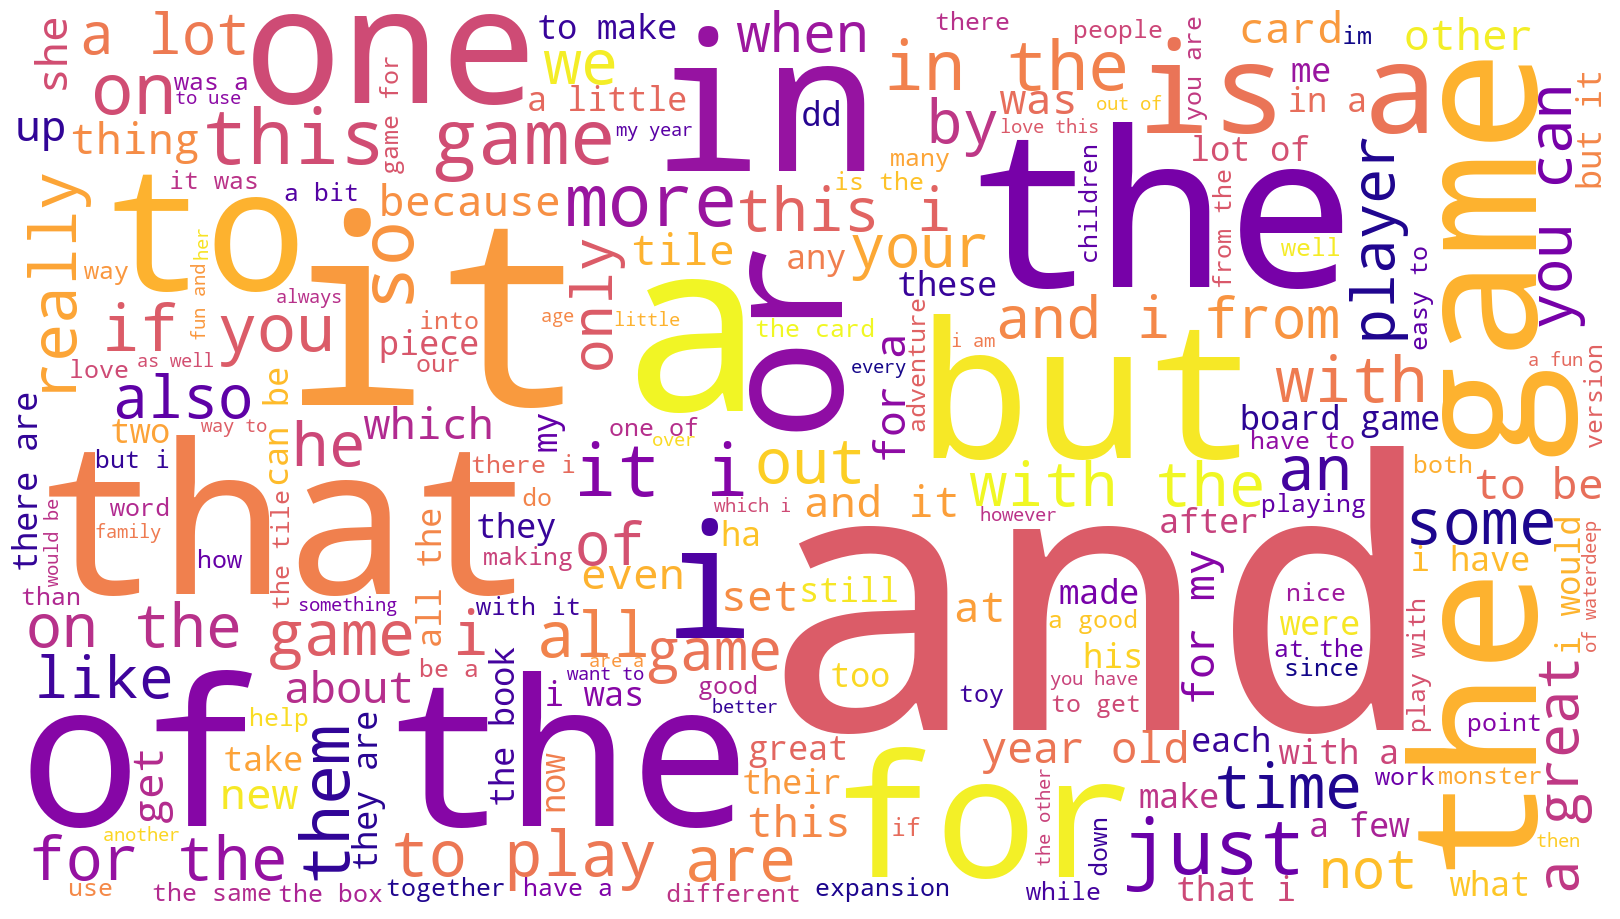

In [58]:
# Review: Plot the WordCloud image.
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(review_word_cloud) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

In [59]:
# Summary: Create a word cloud.
# Review: Create a word cloud.
sns.set(color_codes=True)

# Create a WordCloud object.
summary_word_cloud = WordCloud(width = 1600, height = 900, 
                background_color ='white',
                colormap = 'plasma', 
                stopwords = 'none',
                min_font_size = 10).generate(all_summary) 

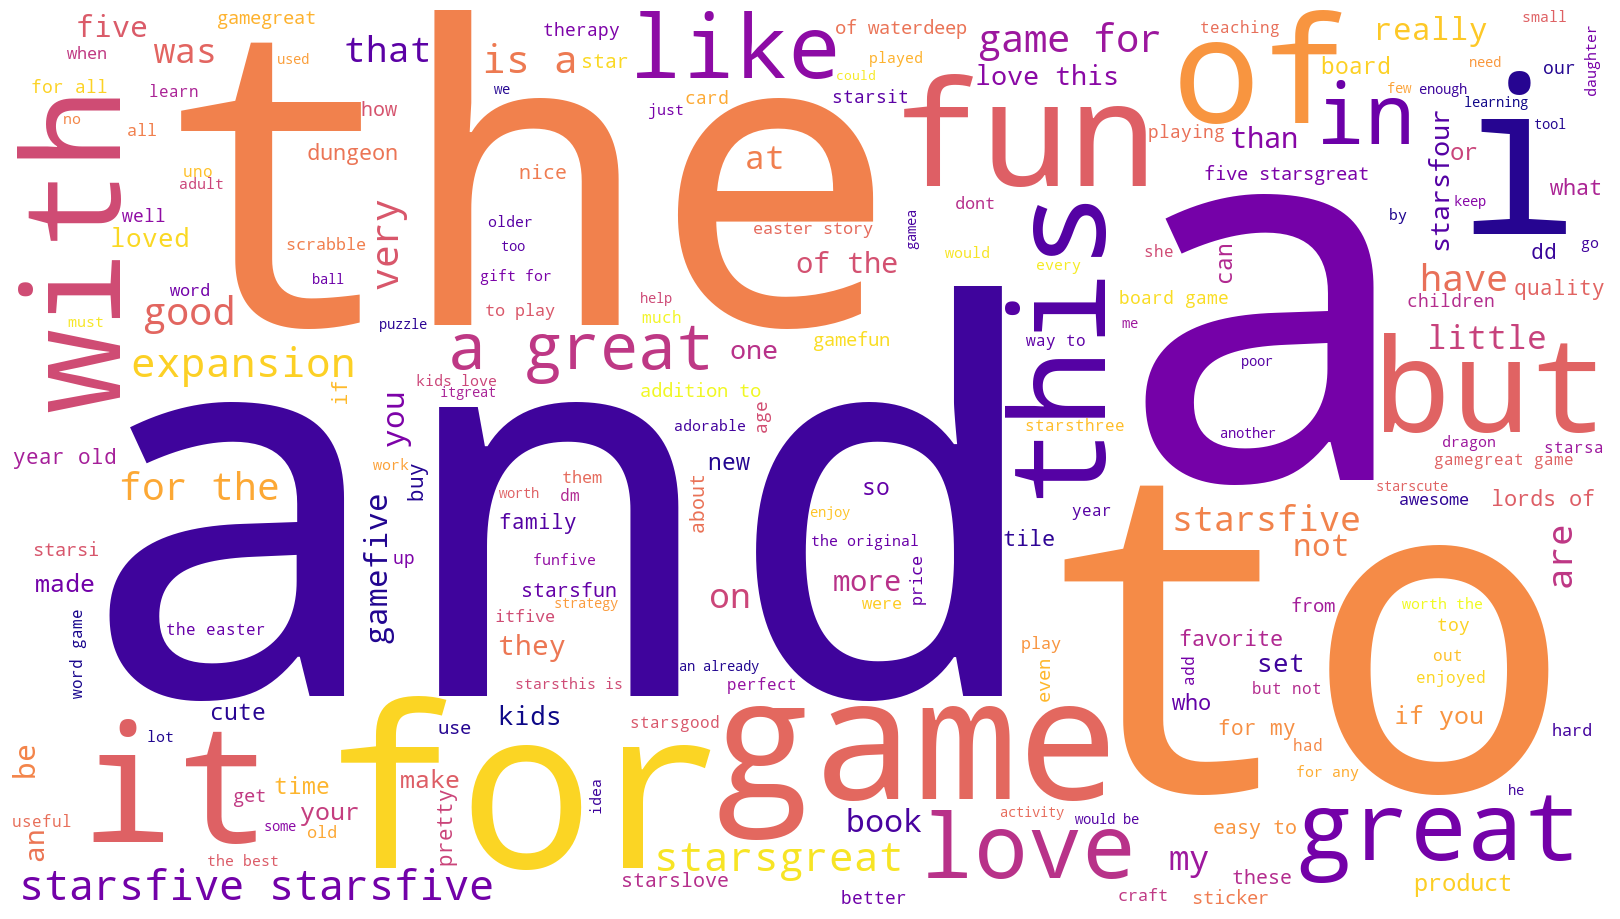

In [60]:
# Summary: Plot the WordCloud image.
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(summary_word_cloud) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

In [61]:
# Apply tokenisation to both columns.
reviews['review_token'] = reviews['review'].apply(word_tokenize)
reviews['summary_token'] = reviews['summary'].apply(word_tokenize)

# View DataFrame.
print(reviews['review_token'].head())
print(reviews['summary_token'].head())

0    [when, it, comes, to, a, dms, screen, the, spa...
1    [an, open, letter, to, galeforce9, your, unpai...
2    [nice, art, nice, printing, why, two, panels, ...
3    [amazing, buy, bought, it, as, a, gift, for, o...
4    [as, my, review, of, gf9s, previous, screens, ...
Name: review_token, dtype: object
0    [the, fact, that, 50, of, this, space, is, was...
1    [another, worthless, dungeon, masters, screen,...
2                 [pretty, but, also, pretty, useless]
3                                        [five, stars]
4                                        [money, trap]
Name: summary_token, dtype: object


In [62]:
# Define an empty list of tokens for review tokens.
all_review_tokens = []

for i in range(reviews.shape[0]):
    # Add each token to the list.
    all_review_tokens = all_review_tokens + reviews['review_token'][i]

In [63]:
# Define an empty list of tokens for summary tokens.
all_summary_tokens = []

for i in range(reviews.shape[0]):
    # Add each token to the list.
    all_summary_tokens = all_summary_tokens + reviews['summary_token'][i]
    

## 4. Frequency distribution and polarity
### 4a) Create frequency distribution

In [64]:
# Determine the frequency distribution fot review.
fdist_review = FreqDist(all_review_tokens)

# Preview the data.
fdist_review

FreqDist({'the': 5451, 'and': 3233, 'to': 3162, 'a': 3160, 'of': 2488, 'i': 2090, 'it': 2083, 'is': 1782, 'this': 1776, 'game': 1671, ...})

In [65]:
# Determine the frequency distribution fot summary.
fdist_summary = FreqDist(all_summary_tokens)

# Preview the data.
fdist_summary

FreqDist({'stars': 427, 'five': 342, 'game': 319, 'great': 295, 'the': 261, 'a': 240, 'for': 232, 'fun': 218, 'to': 192, 'and': 168, ...})

### 4b) Remove alphanumeric characters and stopwords

In [66]:
# Delete all the alpanumeric values.
review_token = [word for word in all_review_tokens if word.isalnum()]
tokens_summary = [word for word in all_summary_tokens if word.isalnum()]

In [67]:
# Remove all the stopwords in review.
# Download the stop word list.
nltk.download ('stopwords')
from nltk.corpus import stopwords

# Create a set of English stop words.
english_stopwords = set(stopwords.words('english'))

# Create a filtered list of tokens without stop words.
tokens2_reivew = [x for x in review_token if x.lower() not in english_stopwords]

# Define an empty string variable.
tokens2_review_string = ''

for value in review_token:
    # Add each filtered token word to the string.
    tokens2_review_string = tokens2_review_string + value + ' '

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\wudwo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [68]:
# Remove all the stopwords in summary.


# Create a filtered list of tokens without stop words.
tokens2_summary = [x for x in review_token if x.lower() not in english_stopwords]

# Define an empty string variable.
tokens2_summary_string = ''

for value in review_token:
    # Add each filtered token word to the string.
    tokens2_summary_string = tokens2_summary_string + value + ' '

### 4c) Create wordcloud without stopwords

In [69]:
# Create a wordcloud without stop words for review.
wordcloud_review = WordCloud(width = 1600, height = 900, 
                background_color ='white', 
                colormap='plasma', 
                min_font_size = 10).generate(tokens2_review_string) 

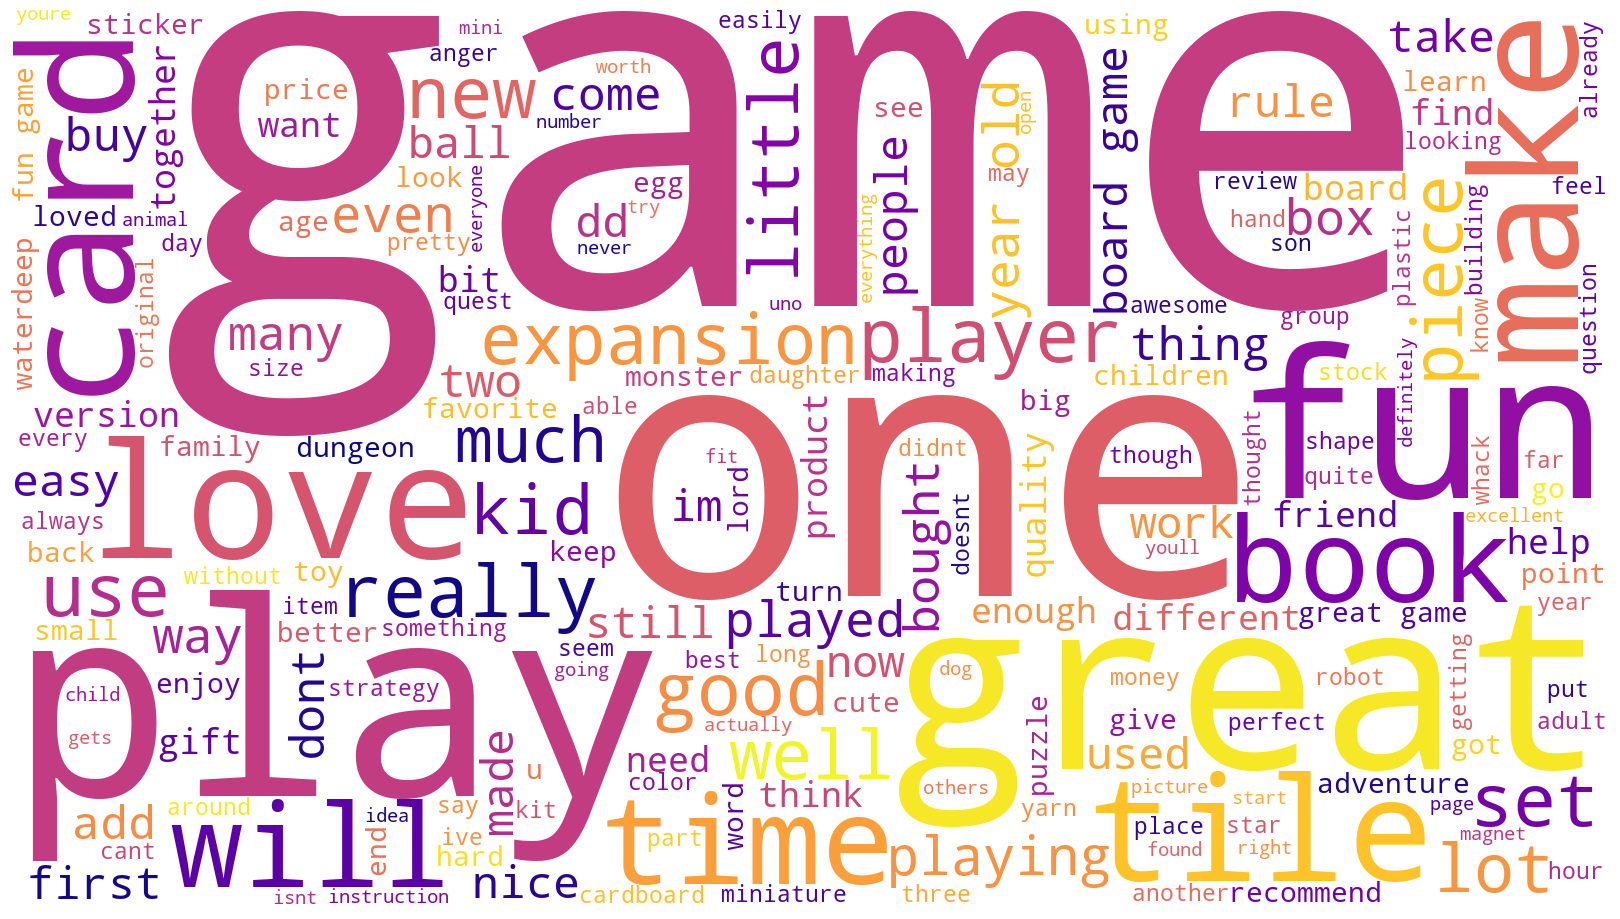

In [70]:
# Plot the WordCloud image for review.                       
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(wordcloud_review) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

In [71]:
# Create a wordcloud without stop words for summary.
wordcloud_summary = WordCloud(width = 1600, height = 900, 
                background_color ='white', 
                colormap='plasma', 
                min_font_size = 10).generate(tokens2_summary_string) 

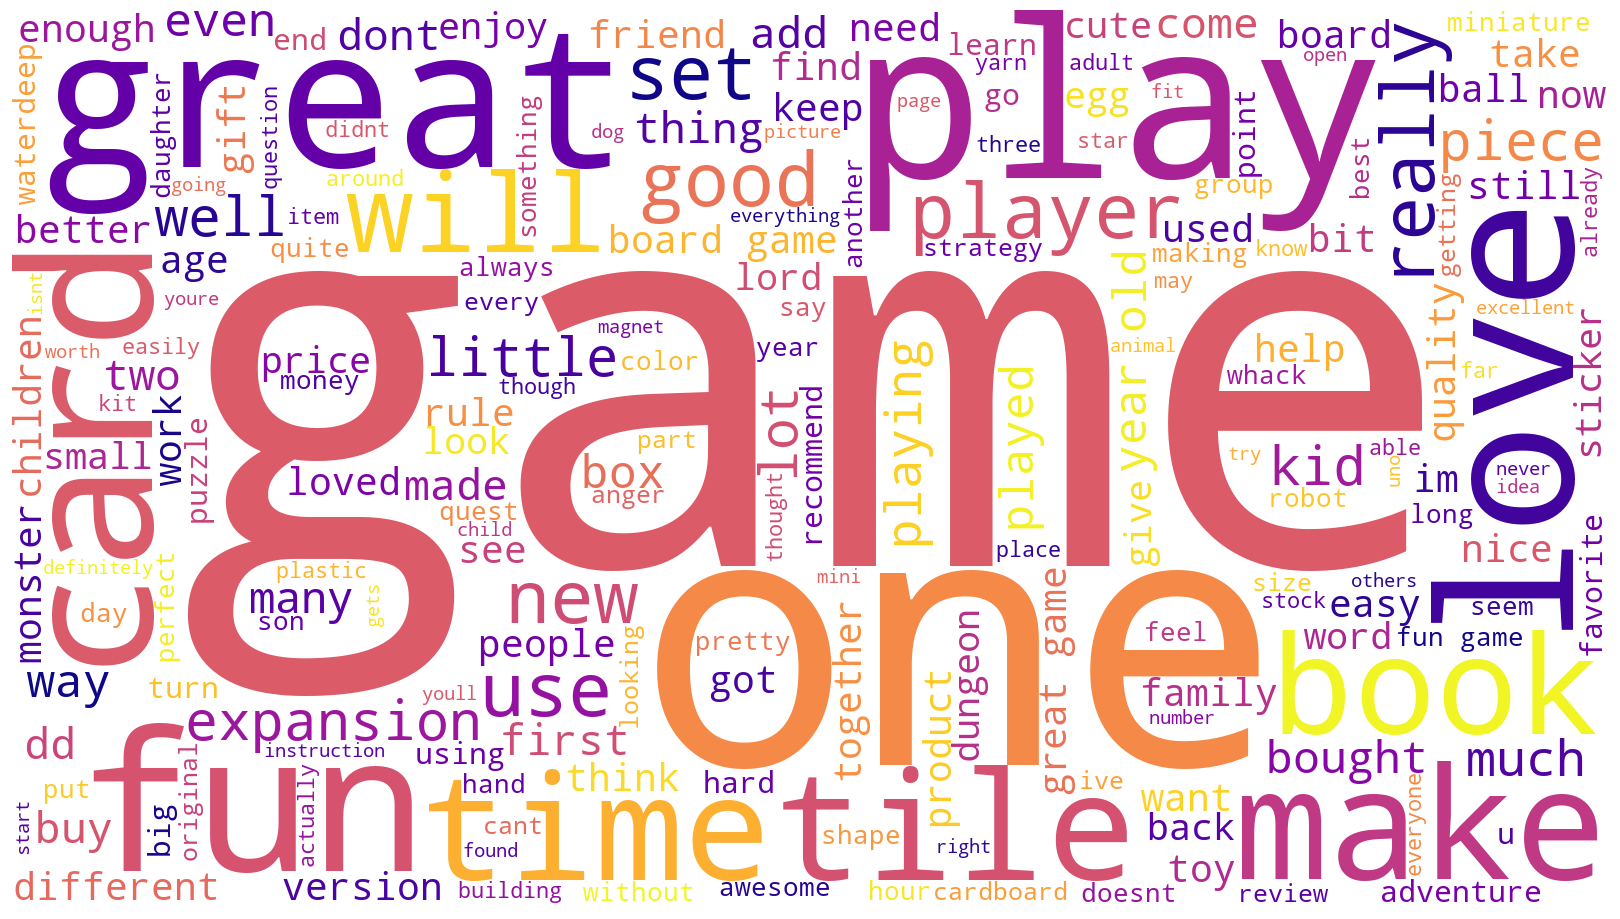

In [72]:
# Plot the WordCloud image for review.                       
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(wordcloud_summary) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

### 4d) Identify 15 most common words and polarity

In [73]:
# Determine the 15 most common words for reivew.
# Import the Counter class.
from collections import Counter


# Generate a DataFrame from Counter.
counts_review = pd.DataFrame(Counter(tokens2_reivew).most_common(15),
                      columns=['Word', 'Frequency']).set_index('Word')

# Preview data.
counts_review


Frequency
Word             
game         1671
great         580
fun           552
one           530
play          502
like          414
love          323
really        319
get           319
cards         301
tiles         297
time          291
good          289
would         280
book          273

In [74]:
# Determine the 15 most common words for summary.

# Generate a DataFrame from Counter.
counts_summary = pd.DataFrame(Counter(tokens2_summary).most_common(15),
                      columns=['Word', 'Frequency']).set_index('Word')

# Preview data.
counts_summary


Frequency
Word             
game         1671
great         580
fun           552
one           530
play          502
like          414
love          323
really        319
get           319
cards         301
tiles         297
time          291
good          289
would         280
book          273

## 5. Review polarity and sentiment: Plot histograms of polarity (use 15 bins) and sentiment scores for the respective columns.

In [75]:
# Provided function.
def generate_polarity(comment):
    '''Extract polarity score (-1 to +1) for each comment'''
    return TextBlob(comment).sentiment[0]

In [76]:
# Determine polarity of review.
def polarity_review(comment):
    return TextBlob(comment).sentiment[0]

# Populate a new column with polarity scores for each comment.
reviews['polarity_review'] = reviews['review'].apply(polarity_review)

# Preview the result.
reviews['polarity_review'].head()


0   -0.036111
1    0.035952
2    0.116640
3    0.578788
4   -0.316667
Name: polarity_review, dtype: float64

In [77]:
# Determine polarity of summary.

def polarity_summary(comment):
    return TextBlob(comment).sentiment[0]

# Populate a new column with polarity scores for each comment.
reviews['polarity_summary'] = reviews['summary'].apply(polarity_review)

# Preview the result.
reviews['polarity_summary'].head()

0    0.15
1   -0.80
2    0.00
3    0.00
4    0.00
Name: polarity_summary, dtype: float64

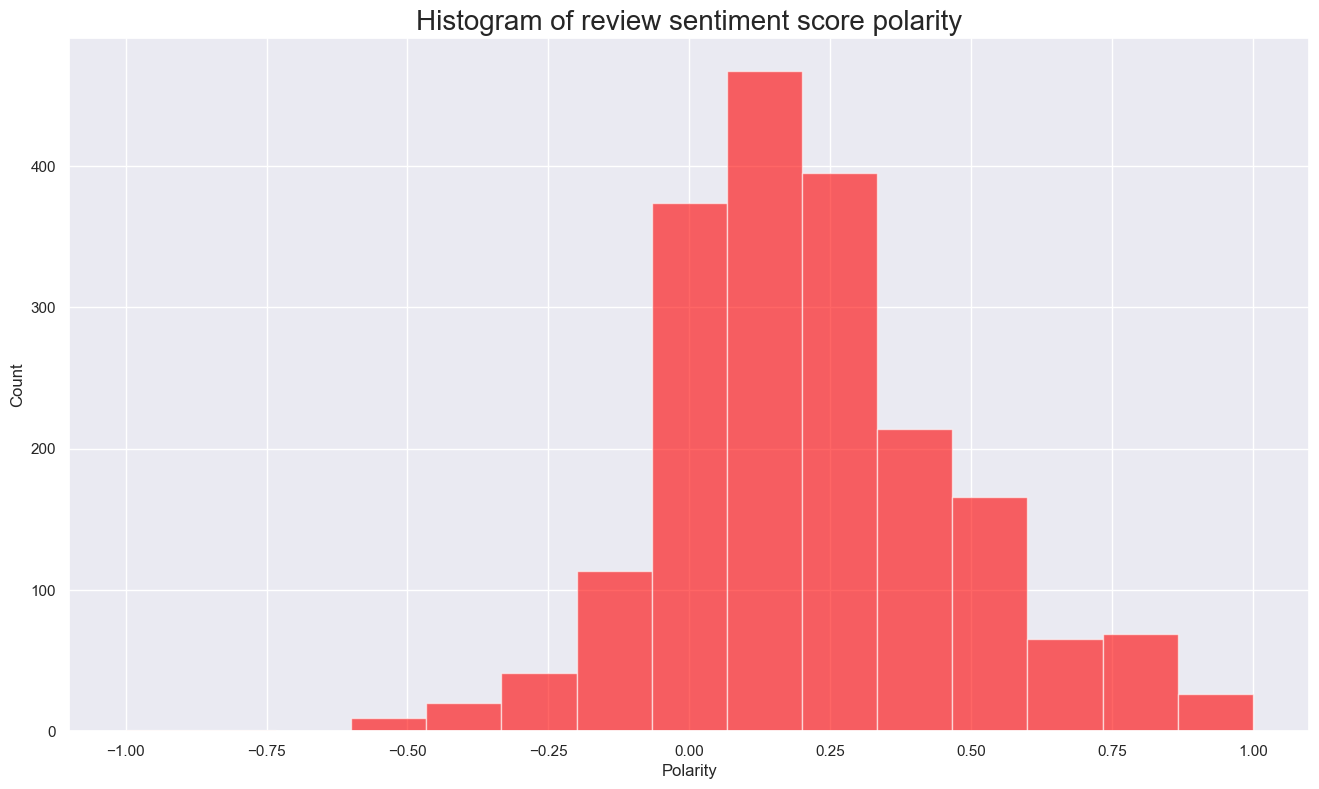

In [78]:
# Review: Create a histogram plot with bins = 15.
# Histogram of polarity
# Set the number of bins.
num_bins = 15

# Set the plot area.
plt.figure(figsize=(16,9))

# Define the bars.
n, bins, patches = plt.hist(reviews['polarity_review'], num_bins, facecolor='red', alpha=0.6)

# Set the labels.
plt.xlabel('Polarity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Histogram of review sentiment score polarity', fontsize=20)

plt.show()

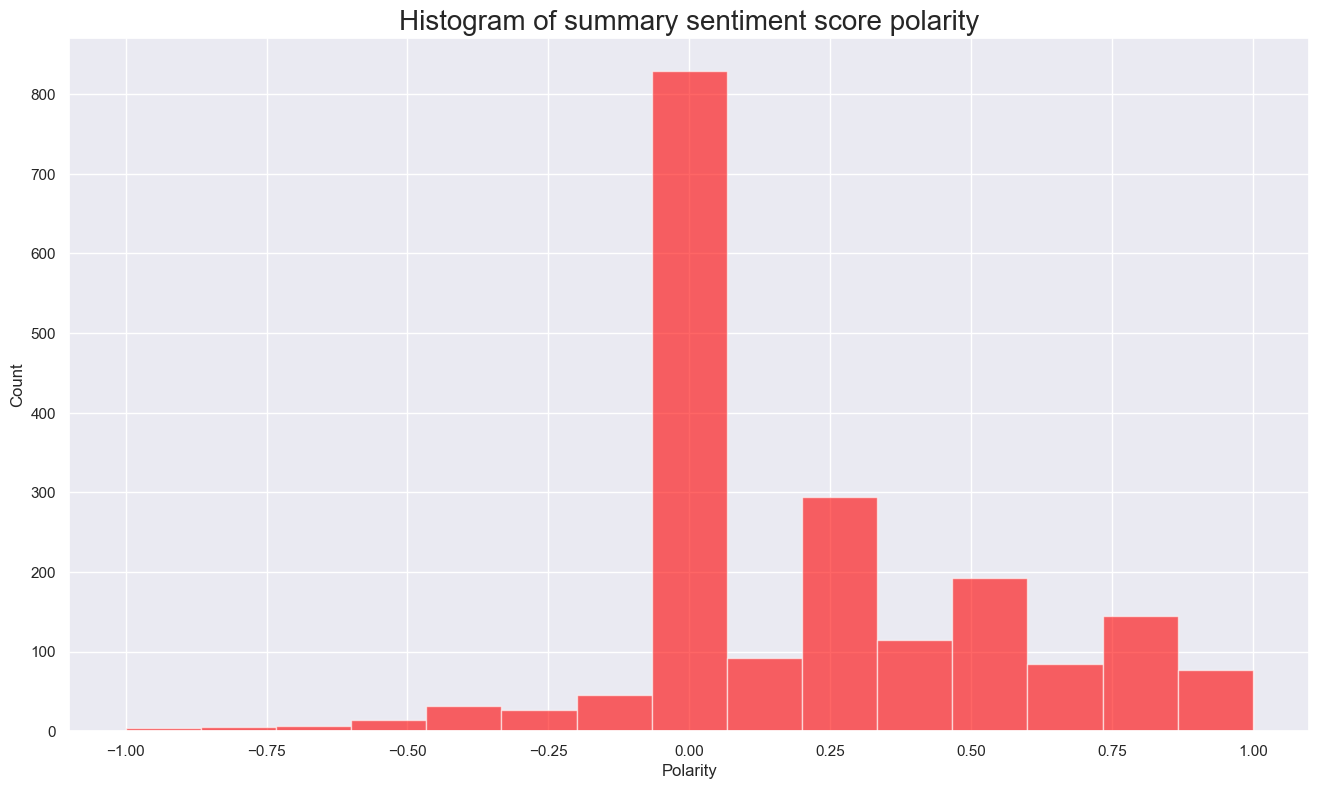

In [79]:
# Summary: Create a histogram plot with bins = 15.
# Histogram of polarity
# Set the number of bins.
num_bins = 15

# Set the plot area.
plt.figure(figsize=(16,9))

# Define the bars.
n, bins, patches = plt.hist(reviews['polarity_summary'], num_bins, facecolor='red', alpha=0.6)

# Set the labels.
plt.xlabel('Polarity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Histogram of summary sentiment score polarity', fontsize=20)

plt.show()




## 6. Identify top 20 positive and negative reviews and summaries respectively

In [80]:
# Top 20 positive reviews.
# Create a DataFrame.
positive_sentiment_review = reviews.nlargest(20, 'polarity_review')

# Eliminate unnecessary columns.
positive_sentiment_review = positive_sentiment_review[['review', 'polarity_review']]

# View output.
positive_sentiment_review

review  polarity_review
7                             came in perfect condition              1.0
164                                        awesome book              1.0
193                                        awesome gift              1.0
489   excellent activity for teaching selfmanagement...              1.0
517                         perfect just what i ordered              1.0
583                                   wonderful product              1.0
601                                  delightful product              1.0
613   wonderful for my grandson to learn the resurre...              1.0
782                                             perfect              1.0
923                                             awesome              1.0
1119                                        awesome set              1.0
1150               best set buy 2 if you have the means              1.0
1159               awesome addition to my rpg gm system              1.0
1282                                        its awesome              1.0
1380  one of the best board games i played in along ...              1.0
1523  my daughter loves her stickers awesome seller ...              1.0
1580  this was perfect to go with the 7 bean bags  i...              1.0
1684                                        awesome toy              1.0
1689  it is the best thing to play with and also min...              1.0
1695                  excellent toy to simulate thought              1.0

In [81]:
# Top 20 negative reviews.
# Create a DataFrame.
negative_sentiment_review = reviews.nsmallest(20, 'polarity_review')

# Eliminate unnecessary columns.
negative_sentiment_review = negative_sentiment_review[['review', 'polarity_review']]

# View output.
negative_sentiment_review


review  polarity_review
207   booo unles you are patient know how to measure...        -1.000000
181                   incomplete kit very disappointing        -0.780000
1773  im sorry i just find this product to be boring...        -0.583333
362   one of my staff will be using this game soon s...        -0.550000
116   i bought this as a christmas gift for my grand...        -0.500000
226   this was a gift for my daughter i found it dif...        -0.500000
229                    i found the directions difficult        -0.500000
289              instructions are complicated to follow        -0.500000
300                                           difficult        -0.500000
1501                         expensive for what you get        -0.500000
173   i sent this product to my granddaughter the po...        -0.491667
345   my 8 yearold granddaughter and i were very fru...        -0.446250
531   i purchased this on the recommendation of two ...        -0.440741
305                 very hard complicated to make these        -0.439583
421                     kids i work with like this game        -0.400000
430   this game although it appears to be like uno a...        -0.400000
490   my son loves playing this game it was recommen...        -0.400000
795                                this game is a blast        -0.400000
798         i bought this for my son he loves this game        -0.400000
814             was a gift for my son he loves the game        -0.400000

In [82]:
# Top 20 positive summaries.
# Create a DataFrame.
positive_sentiment_summary = reviews.nlargest(20, 'polarity_summary')

# Eliminate unnecessary columns.
positive_sentiment_summary = positive_sentiment_summary[['summary', 'polarity_summary']]

# View output.
positive_sentiment_summary


summary  polarity_summary
6                                  best gm screen ever               1.0
28                                   wonderful designs               1.0
32                                             perfect               1.0
80   theyre the perfect size to keep in the car or ...               1.0
133                            perfect for preschooler               1.0
139             awesome sticker activity for the price               1.0
160                                       awesome book               1.0
162                    he was very happy with his gift               1.0
186                                            awesome               1.0
209           awesome and welldesigned for 9 year olds               1.0
412                                            perfect               1.0
468                                          excellent               1.0
536                                          excellent               1.0
541                             excellent therapy tool               1.0
572  the pigeon is the perfect addition to a school...               1.0
591                          best easter teaching tool               1.0
639                                          wonderful               1.0
643              all f the mudpuppy toys are wonderful               1.0
649                                     awesome puzzle               1.0
654                               not the best quality               1.0

In [83]:
# Top 20 negative summaries.

# Create a DataFrame.
negative_sentiment_summary = reviews.nsmallest(20, 'polarity_summary')

# Eliminate unnecessary columns.
negative_sentiment_summary = negative_sentiment_summary[['summary', 'polarity_summary']]

# View output.
negative_sentiment_summary

summary  polarity_summary
21                        the worst value ive ever seen         -1.000000
207    boring unless you are a craft person which i am          -1.000000
819                                              boring         -1.000000
1148  before this i hated running any rpg campaign d...         -0.900000
1     another worthless dungeon masters screen from ...         -0.800000
143                                        disappointed         -0.750000
623                                        disappointed         -0.750000
785                                        disappointed         -0.750000
1591                                       disappointed         -0.750000
361   promotes anger instead of teaching calming met...         -0.700000
875            too bad this is not what i was expecting         -0.700000
880                        bad qualityall made of paper         -0.700000
177     at age 31 i found these very difficult to make          -0.650000
100                                    small and boring         -0.625000
511                                          mad dragon         -0.625000
797                                       disappointing         -0.600000
1001                                      disappointing         -0.600000
1099                                      disappointing         -0.600000
1773                                      disappointing         -0.600000
991   then you will find this board game to be dumb ...         -0.591667

## 7. Discuss: Insights and observations

***Your observations here...***

Review
The histogram indicates that most reviews are positive. The positive reviews inndicate that customers like the toy, game, and book products. However, the negative comments indicate that the instrcutions that come with the toys are too complicated.

Summary
The histogram suggests thay most summaries are skewed in the positive side. The negative summaries show that some customers are disappointed with the products. It is worth investigating why the customers' expectations are not met.

# 